# My (Second) First Notebook:
Oh well, I tried to do a simple notebook to identify different characters from the strawhats. But it failed, and got so convoluted that I figured I might as well clean up everything and start from scratch. So here goes.

The process to create a deep-learning model for images seems to be roughly the following
1. Find images to train the model on (obviously this will vary based on the problem)
2. Validate the images and label them somehow. (One way is to simply arrange them in folders)
3. If you got a lot of money and data, train your own model from scratch with super powerful computers **OR** If you're everyone else, use a pretrained model and fine-tune it for your purposes.
4. Test the model
5. If it works, enjoy as this model can be used like pretty much any other standard function. If not starts debugging time. And maybe reconsider if AI is the best solution for your issue.

In [ ]:
# Step 1 : Find images
Since I am really building this as a mean to test the technology, I will simply nerd out. I want to create a model which can precisely identify characters from One Piece, more specifically characters from the Mugiwaras. 

As of (2023-10-23), this means:
- Luffy (Captain)
- Zoro (Vice-Captain)
- Nami (Navigator)
- Usopp (Sharpshooter)
- Sanji (Cook)
- Chopper (Doctor)
- Robin (Mom)
- Franky (Shipwright)
- Brook (Musician)
- Jinbei (Helmsman)



# 0. Install what needs to be installed.

In [20]:
!pip install duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 22.1.0
    Uninstalling aiofiles-22.1.0:
      Successfully uninstalled aiofiles-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


# 1. Download and Verify the Images

In [32]:
from duckduckgo_search import ddg_images
from fastcore.all import *
import os

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')
def verify_downloaded_images(directory):
    
    for filename in directory:
        img_path = Path(os.path.join(directory, filename))
        verify(img_path)

In [37]:
from fastai.vision.all import *
from fastcore.all import *
import os
#We will search all the elements of this list. To make them distinctive, monikers were added.
theMugiwaras = "Monkey D Luffy", "Roronoa Zoro", "Nami, the cat burglar", "Usopp", "Sanji Vinsmoke", "Nico Robin", "Tony Tony Chopper", "Brook, the Soul King", "Franky, Cyborg", "Jinbei"
parent_directory = Path("theMugiwaras")
parent_directory.mkdir(exist_ok=True, parents=True)
for member in theMugiwaras:
    member_directory = Path(os.path.join(parent_directory,member))
    member_directory.mkdir(exist_ok=True, parents=True)
    download_images(member_directory,urls=search_images(member, 50))
    download_images(member_directory,urls=search_images(member + " angry", 50))
    download_images(member_directory,urls=search_images(member + " post timeskip", 50))
    
    

Searching for 'Monkey D Luffy'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Searching for 'Monkey D Luffy angry'
Searching for 'Monkey D Luffy post timeskip'
Searching for 'Roronoa Zoro'
Searching for 'Roronoa Zoro angry'
Searching for 'Roronoa Zoro post timeskip'
Searching for 'Nami, the cat burglar'
Searching for 'Nami, the cat burglar angry'
Searching for 'Nami, the cat burglar post timeskip'
Searching for 'Usopp'
Searching for 'Usopp angry'
Searching for 'Usopp post timeskip'
Searching for 'Sanji Vinsmoke'
Searching for 'Sanji Vinsmoke angry'
Searching for 'Sanji Vinsmoke post timeskip'
Searching for 'Nico Robin'
Searching for 'Nico Robin angry'
Searching for 'Nico Robin post timeskip'
Searching for 'Tony Tony Chopper'
Searching for 'Tony Tony Chopper angry'
Searching for 'Tony Tony Chopper post timeskip'
Searching for 'Brook, the Soul King'
Searching for 'Brook, the Soul King angry'
Searching for 'Brook, the Soul King post timeskip'
Searching for 'Franky, Cyborg'
Searching for 'Franky, Cyborg angry'
Searching for 'Franky, Cyborg post timeskip'
Searching f

Then after we're done downloading, we use the fastai provided methods to quickly get rid of any image invalid images.

In [38]:
invalid_images = verify_images(get_image_files(parent_directory))
invalid_images.map(Path.unlink)
len(invalid_images)

74

# 2. We train the model

First we create a dataloader for it.

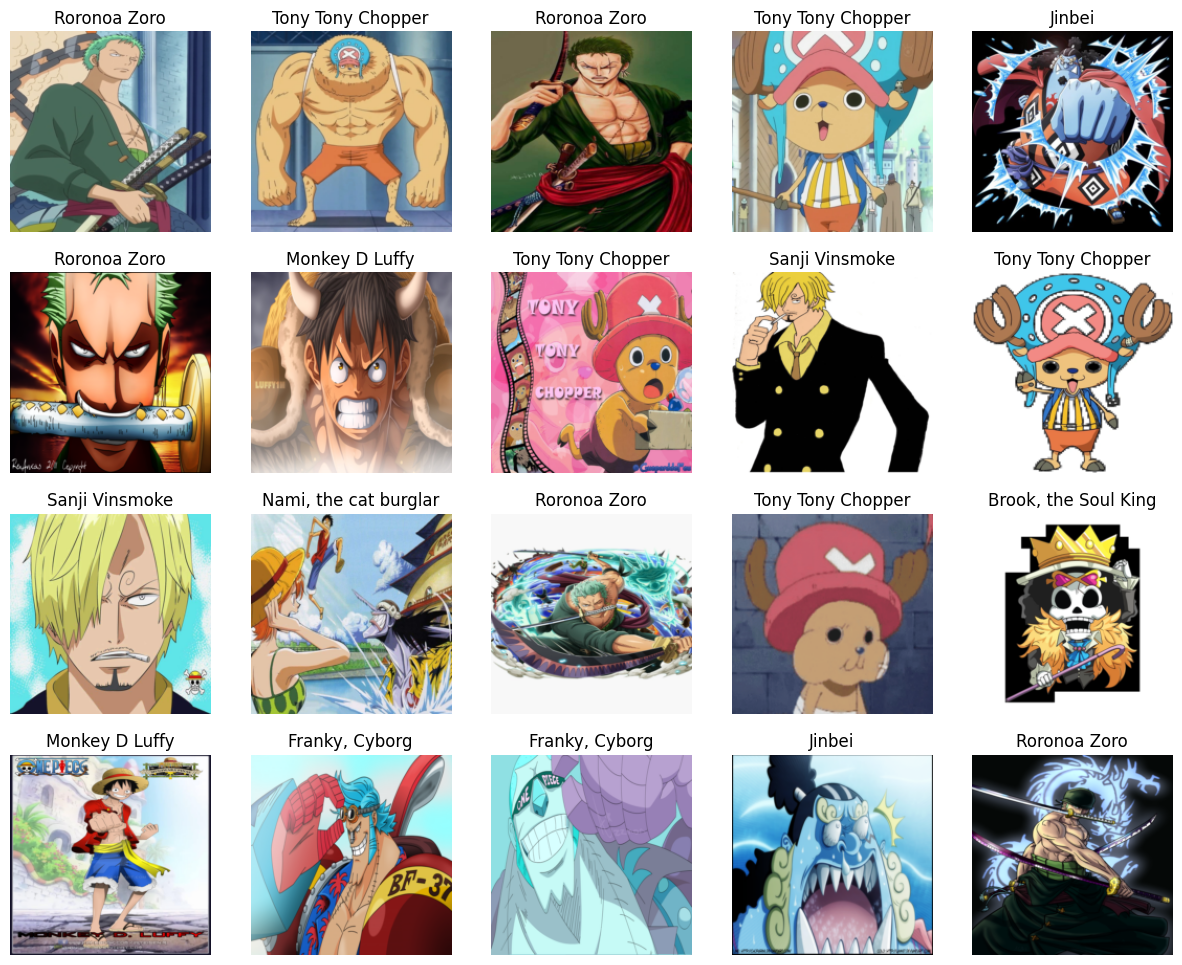

In [42]:
#Create a dataloader
dataloader = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(parent_directory, bs=32)

dataloader.show_batch(max_n=20)

And then we make a learner, learn on our dataset.

In [44]:
learn = vision_learner(dataloader, resnet18, metrics=error_rate)
learn.fine_tune(10)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 197MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,2.430380,0.804811,0.249191,00:36


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.773668,0.578395,0.190939,00:29
1,0.490084,0.500074,0.145631,00:29
2,0.281130,0.460726,0.129450,00:28
3,0.162733,0.445775,0.113269,00:29
4,0.092876,0.480277,0.135922,00:28
5,0.060148,0.455090,0.113269,00:28
6,0.036384,0.473529,0.110032,00:28
7,0.024649,0.463006,0.106796,00:28
8,0.017895,0.462304,0.103560,00:28
9,0.013438,0.463723,0.103560,00:28


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

# Test
It seems, our learner didn't learn super well. After all it's loss is pretty big. Still for fun, let's try passing a random file to it.

('Monkey D Luffy', tensor(3), tensor([6.2201e-07, 1.1698e-08, 1.5723e-07, 1.0000e+00, 9.4014e-08, 1.1159e-06,
        1.4036e-09, 2.1756e-08, 5.8656e-08, 1.7023e-08]))


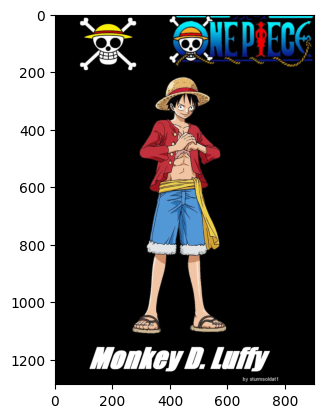

In [55]:
print(learn.predict("/kaggle/working/theMugiwaras/Monkey D Luffy/e96954a9-8afa-4c23-8a79-0e64d18b778c.png"))
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/kaggle/working/theMugiwaras/Monkey D Luffy/e96954a9-8afa-4c23-8a79-0e64d18b778c.png')
imgplot = plt.imshow(img)
plt.show()

The above is not too readable, but math tells me that it thinks this image of luffy is actually the 4th person in our list (Usopp). So you've disappointed me AI. Is there anything we can do to help our model get better? Well let's try to clean up the data. Now that we got a working model, we can use the model to sort the data and we can then correct false associations.

Note. Sadly, we will need to change platforms since Kaggle doesn't show the ImageClassifierCleaner widget. Hence we will need to change platforms. Likely in a proper jupyter setup.

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


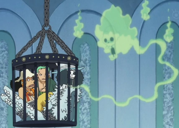

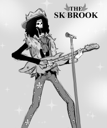

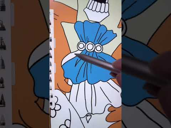

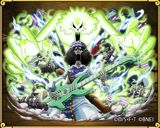

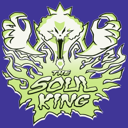

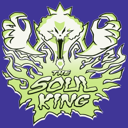

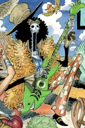

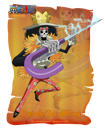

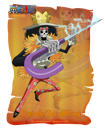

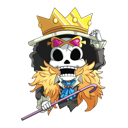

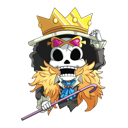

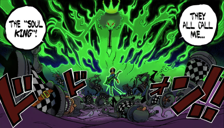

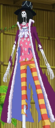

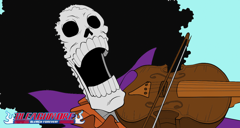

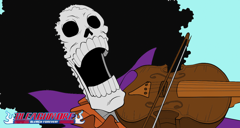

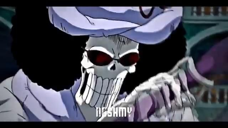

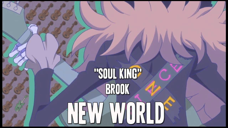

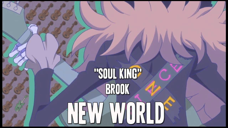

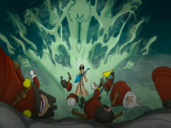

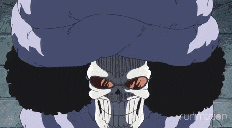

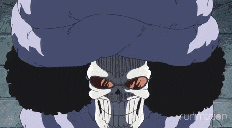

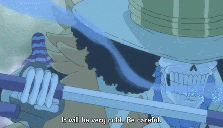

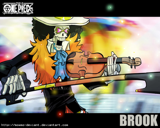

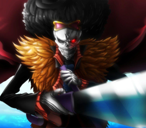

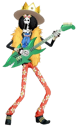

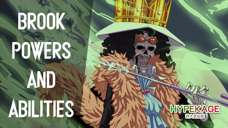

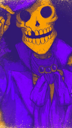

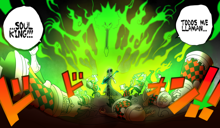

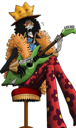

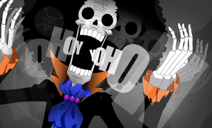

In [65]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner